App Review Sentiment Analysis

In [10]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv("linkedin-reviews - linkedin-reviews.csv")

In [12]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
# Plotting the distribution of ratings

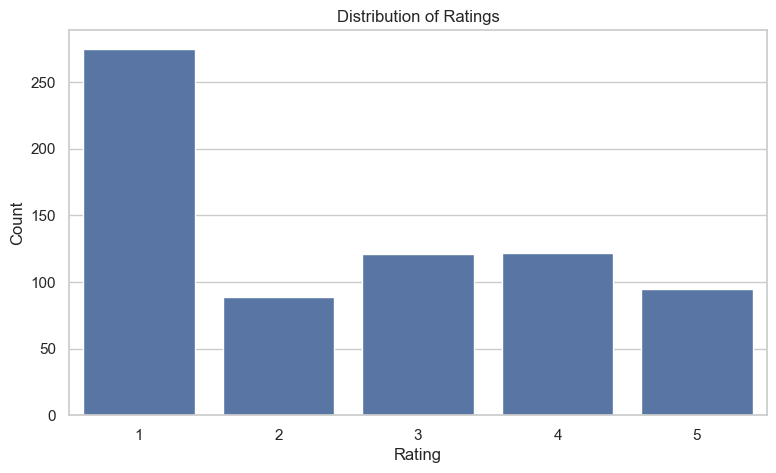

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.countplot(data=df , x="Rating")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [19]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 647.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 647.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 647.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 647.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 647.0 kB/s eta 0:00:02
   -----------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from textblob import TextBlob

In [21]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity>0.1:
        return "Positive"
    elif sentiment.polarity<0.1:
        return "Negative"
    else:
        return "Neutral"

In [25]:
df["Sentiment"]=df["Review"].apply(textblob_sentiment_analysis)

In [32]:
df.sample(5)

,Review,Rating,sentiment,Sentiment
364,Latest update is completely broken.,1,Negative,Negative
612,The app may be nice but I don't like the fact ...,2,Positive,Positive
669,"The old interface was just fine, this is confu...",1,Negative,Negative
685,it's worse than the old one....,1,Negative,Negative
16,This is a very good start toward emulating the...,5,Positive,Positive


In [33]:
# analyzing App Review Sentiments

In [34]:
sentiment_distribution= df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Negative    396
Positive    295
Neutral      11
Name: count, dtype: int64

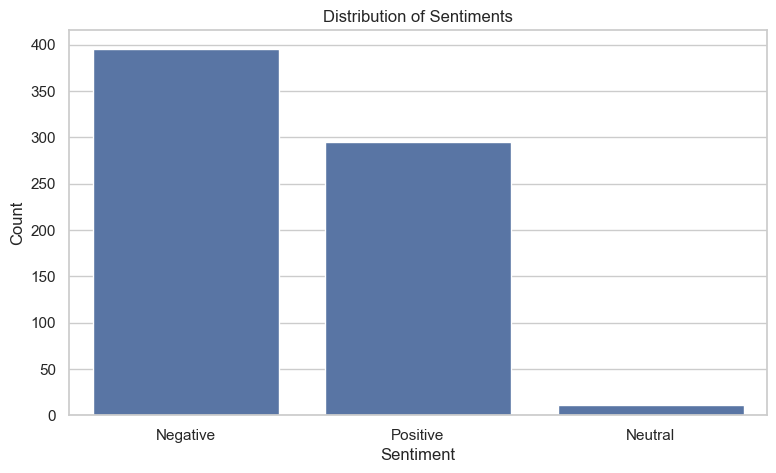

In [35]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,
           y=sentiment_distribution.values)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

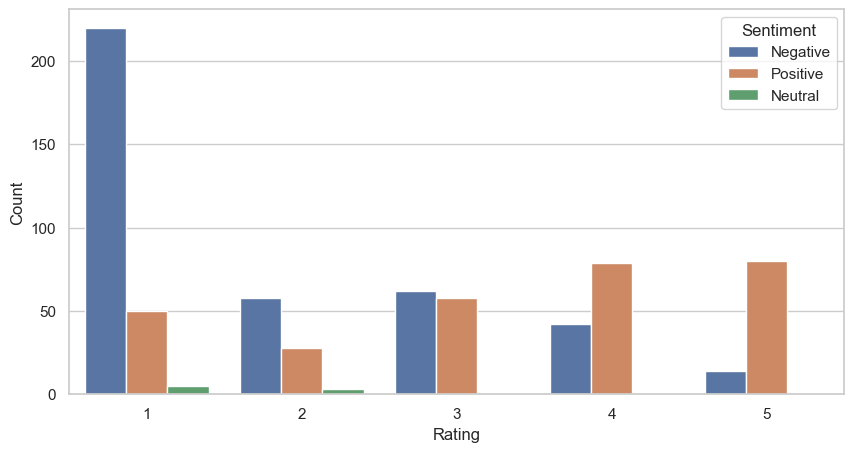

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
             x="Rating",
             hue="Sentiment")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()